<a href="https://colab.research.google.com/github/HamidBekamiri/ds-master/blob/main/notebooks/M1-Linear-Algebra-Vectors-V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial 1: Vectors
*Estimated timing to here from start of tutorial: 90 min*


In [1]:
#@title import
import math
import numpy as np
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/CarPrice_Assignment.csv

--2022-09-21 06:02:12--  https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/CarPrice_Assignment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26717 (26K) [text/plain]
Saving to: ‘CarPrice_Assignment.csv’

CarPrice_Assignment 100%[===================>]  26.09K  --.-KB/s    in 0.001s  

2022-09-21 06:02:12 (17.1 MB/s) - ‘CarPrice_Assignment.csv’ saved [26717/26717]



In [2]:
#@title install handcalcs

!pip install handcalcs -q
!pip install innerscope -q
import handcalcs.render
from math import sqrt, pi
from handcalcs.decorator import handcalc
from math import sqrt

     |████████████████████████████████| 89 kB 4.5 MB/s 
     |████████████████████████████████| 271 kB 17.8 MB/s 
     |████████████████████████████████| 71 kB 184 kB/s 
     |████████████████████████████████| 133 kB 64.4 MB/s 
     |████████████████████████████████| 107 kB 47.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [3]:
#@title Figure settings
import ipywidgets as widgets       # interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
%matplotlib inline
from matplotlib import pyplot
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp4plot'
urlretrieve(URL, 'plot_helper.py')
import sys
sys.path.append('../scripts/')
from plot_helper import *
# !wget "https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/CarPrice_Assignment.csv?token=GHSAT0AAAAAABUHW5ANNAFZJBTAAMDDYHZAYTXMASA"

In [4]:
# @title Plotting functions
def visualize_vectors(v, v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size (2,) with the vector coordinates
    v_unit (ndarray): array of size (2, ) with the unit vector coordinates

  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF', length_includes_head = True, zorder = 2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08, color='#DC267F', length_includes_head = True, zorder = 3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr], [r"Vector $\mathbf{v}$", r"Normalized vector $\tilde{\mathbf{v}}$"], handlelength = 0, fontsize = 20, loc = 'upper left')
  for handle, label in zip(leg.legendHandles, leg.texts):
    label.set_color(handle.get_facecolor())
    handle.set_visible(False)

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# Section 1.1: Intro to vectors

## Why do we need Linear Algebra?

Machines only understand numbers. For instance, if you want to calculate semantic similarity between two sentences you have first to convert your text data into numbers (for instance, through word embeddings). 

Data can then be stored in vectors, matrices, and tensors. For instance, images are represented as matrices of values between 0 and 255 representing the darkness and lightness of each color for each pixel. 
For manipulating these vectors, matrices, and tensors, Linear Algebra is used.


# Section 1.2: What is a vector?


1. **A vector** is an ordered list of numbers that through it we can show a set of variables or features stored in order.

2. **The dimensionality of a vector:**  is determined by the number of components in the ordered list that represent the dimensionality of the space in which the arrow exists.

#### **Review relevant Terms**


- Coordinates are values describing a position. For instance, any position on earth can be specified by geographical coordinates (latitude, longitude, and elevation).

- Geometric vectors, also called Euclidean vectors, are mathematical objects defined by their magnitude (the length) and their direction.

- we used a coordinate system called the *Cartesian plane*. The horizontal and vertical lines are the *coordinate axes*, usually labeled respectively $x$ and $y$. The intersection of the two coordinates is called the *origin* and
corresponds to the coordinate 0 for each axis.

- The Cartesian coordinate system can be extended to more
dimensions: the position of a point in a $n$-dimensional space is
specified by $n$ coordinates. The real coordinate $n$-dimensional space,
containing $n$-tuples of real numbers, is named $R^n$.

- Coordinate vectors are ordered lists of numbers corresponding to the vector coordinates. Since vector initial points are at the origin, you need to encode only the coordinates of the terminal point.

**Notation**

We’ll use lowercase, boldface letters to name vectors (such as ***v***).
(in other ressources, you might also encounter a letter with an arrow,
like $\vec v$, especially for handwriting, where boldface is not
possible.)

In [ ]:
V = np.array([2, 2])

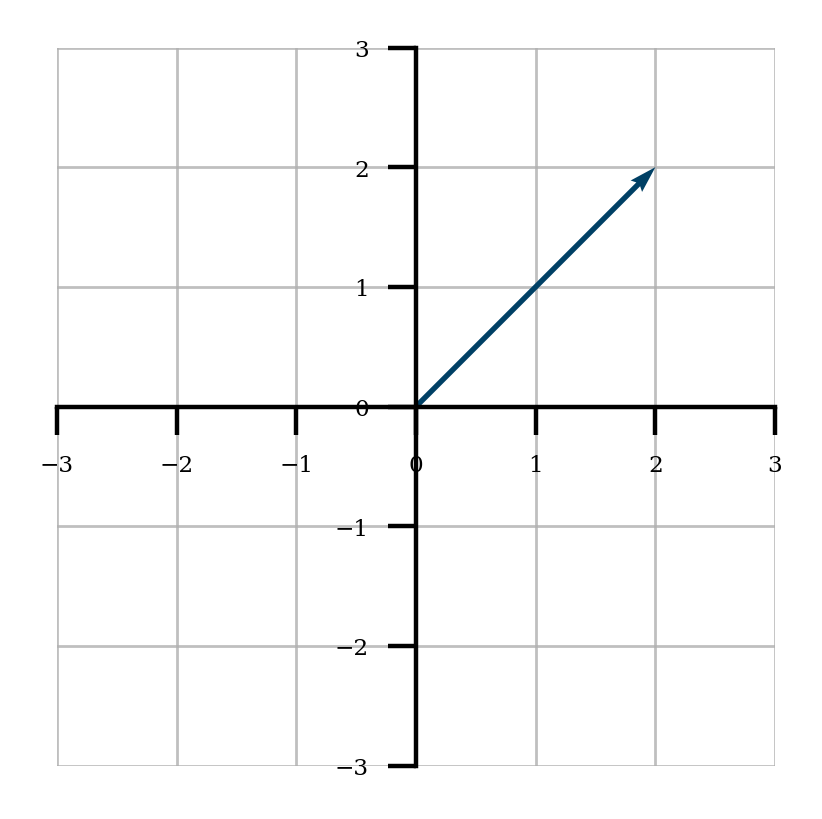

In [ ]:
plot_vector([V])

\begin{align}
        V = \begin{bmatrix}
2  \\
2
\end{bmatrix} 
    \end{align}

Each value is associated with a direction: in this case, the first value
corresponds to the $x$-axis direction and the second number to the
$y$-axis.

**Indexing**

*Indexing* refers to the process of getting a vector component (one of
the values from the vector) using its position (its index).

Python uses zero-based indexing, meaning that the first index is zero.


**Numpy**

In Numpy, vectors are called *one-dimensional arrays*. You can use the
function `np.array()` to create one:

In [ ]:
v = np.array([3, 2])
v

array([3, 2])

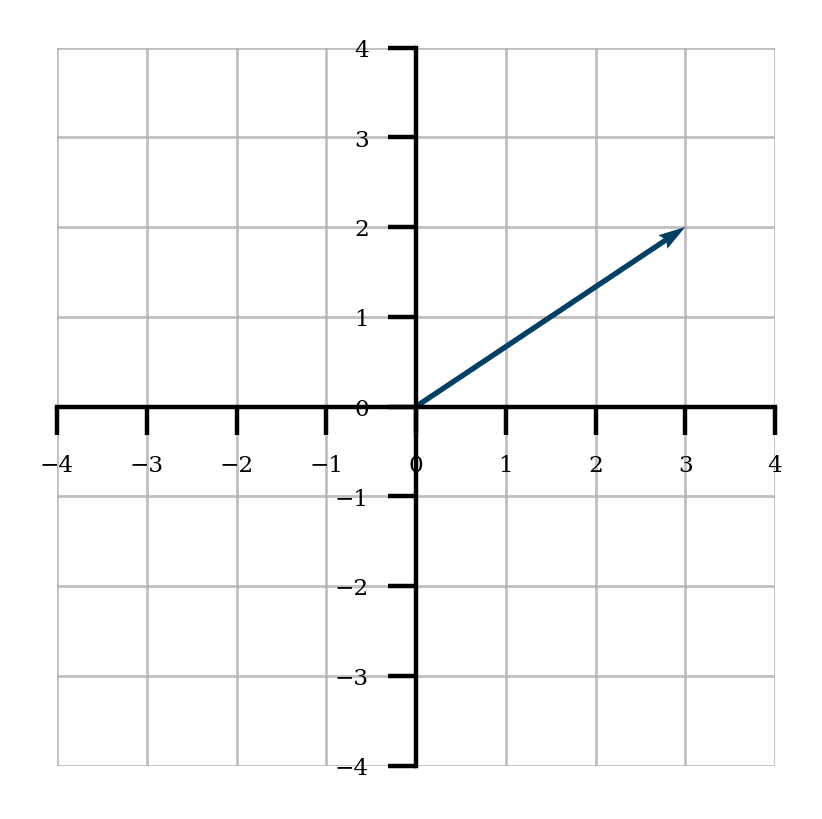

In [ ]:
plot_vector([v])

# Section 1.3: Standard Basis Vectors

**A Standard basis vectors**  are one-unit-long vectors which are aligned with an axis. We can write any vector in that space in terms of the basis.


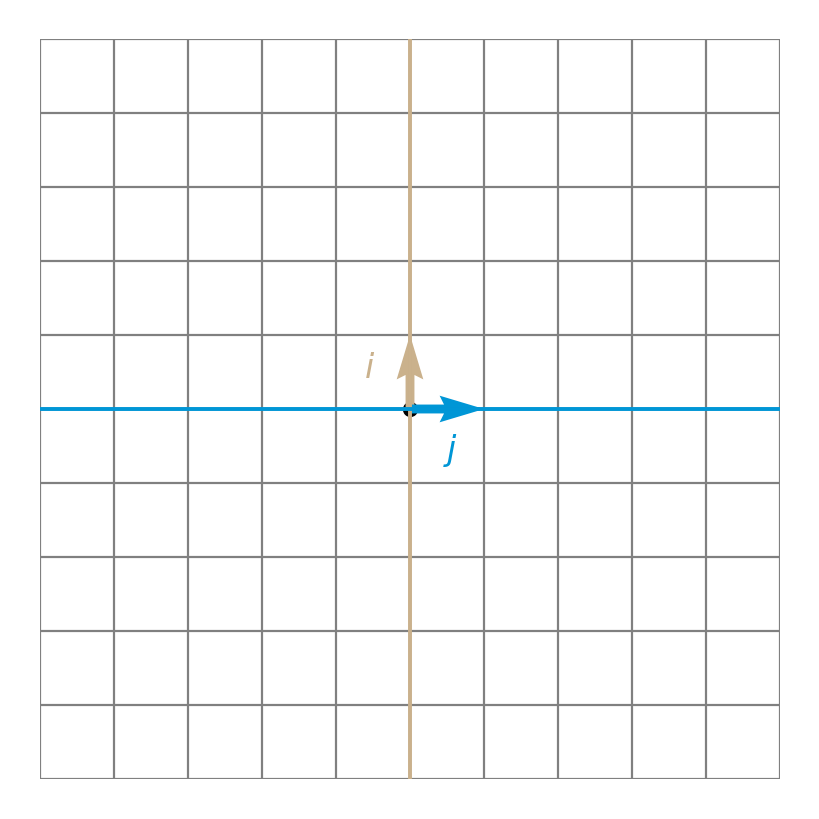

In [ ]:
plot_basis(np.array([0, 1]), np.array([1, 0]))

For example we can define $A = [2, 1]$ based on $j = [1, 0]$ and $i = [0, 1]$

---




\begin{align}
        A = \begin{bmatrix}
2  \\
1
\end{bmatrix} = 2
    \begin{bmatrix} 
1 \\
0
\end{bmatrix}
+ 1
        \begin{bmatrix}
0 \\
1
\end{bmatrix}= 2i + 1j
    \end{align}




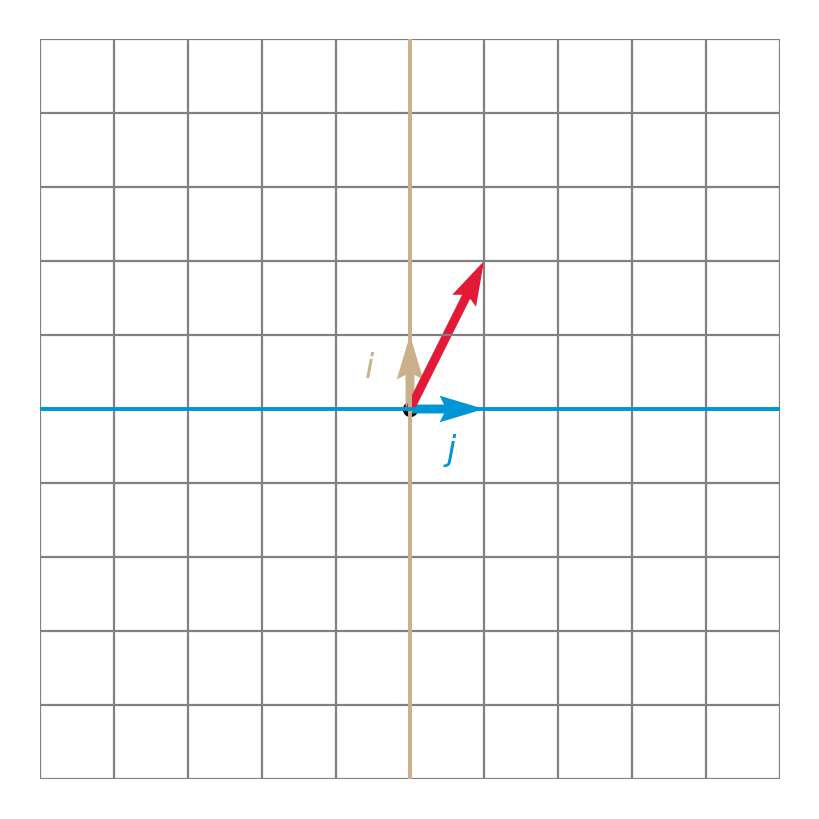

In [ ]:
# let's plot A in coordinate system
plot_basis(np.array([0, 1]), np.array([1, 0]), np.array([2, 1]))

***The standard basis of a coordinate vector space*** (such as $\mathbb{R^3}$) is the set of basis vectors whose components are all zero, except one that equals $1$. 
$$e_x=(1,0,0), e_y=(0,1,0), e_z=(0,0,1).$$
---



![](https://upload.wikimedia.org/wikipedia/commons/f/fd/3D_Vector.svg)

***Number of basis vectors is Dimensionality of the space***

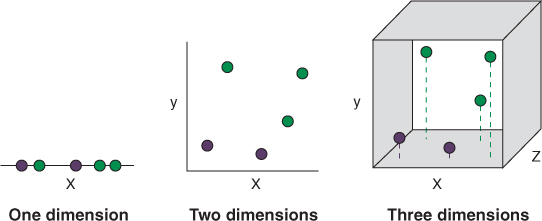

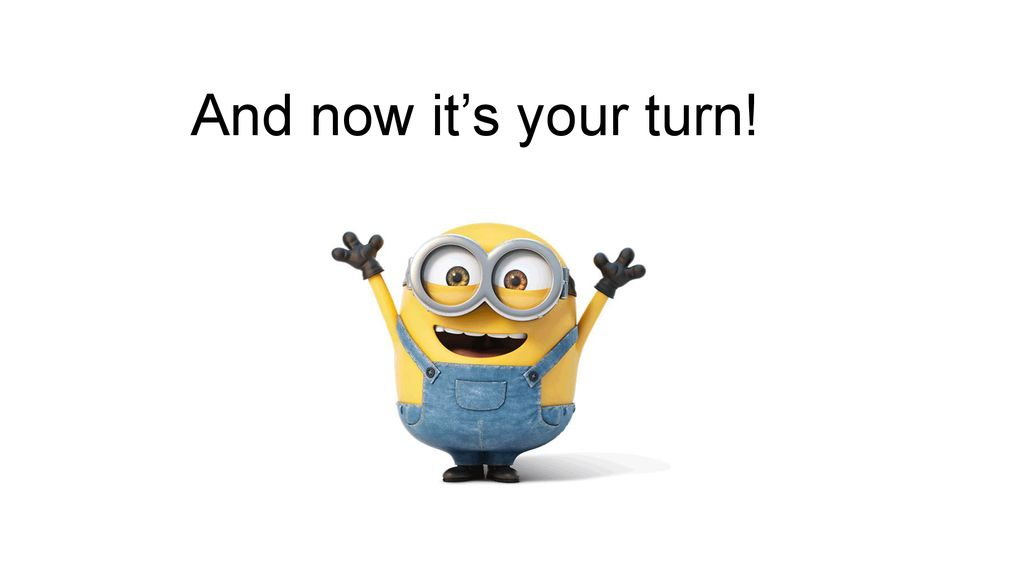

# Section 1.4: Vector operations 
*Estimated timing to here from start of tutorial: 20 min*

There 4 different types of vector operations that in this tutorial we focus on those:

1. **Vector addition**
2. **Scalar multiplication**
3. **Linear combination**
4. **Dot product** (scalar product or inner product)
5.  Hadamard product (element-wise multiplication)
6. Transposition

## 1.4.1 Vector addition

**Vector addition** is the operation of adding two or more vectors together into a vector sum. 

![](http://media5.datahacker.rs/2020/03/Picture40-1024x724.jpg)

In this example we calcualte additional vector for two vectors $A$ and $B$:

- $A = [1, 3]$
- $B = [2, 1]$

In [ ]:
A = np.array([1, 3])
B = np.array([2, 1])
C = A + B

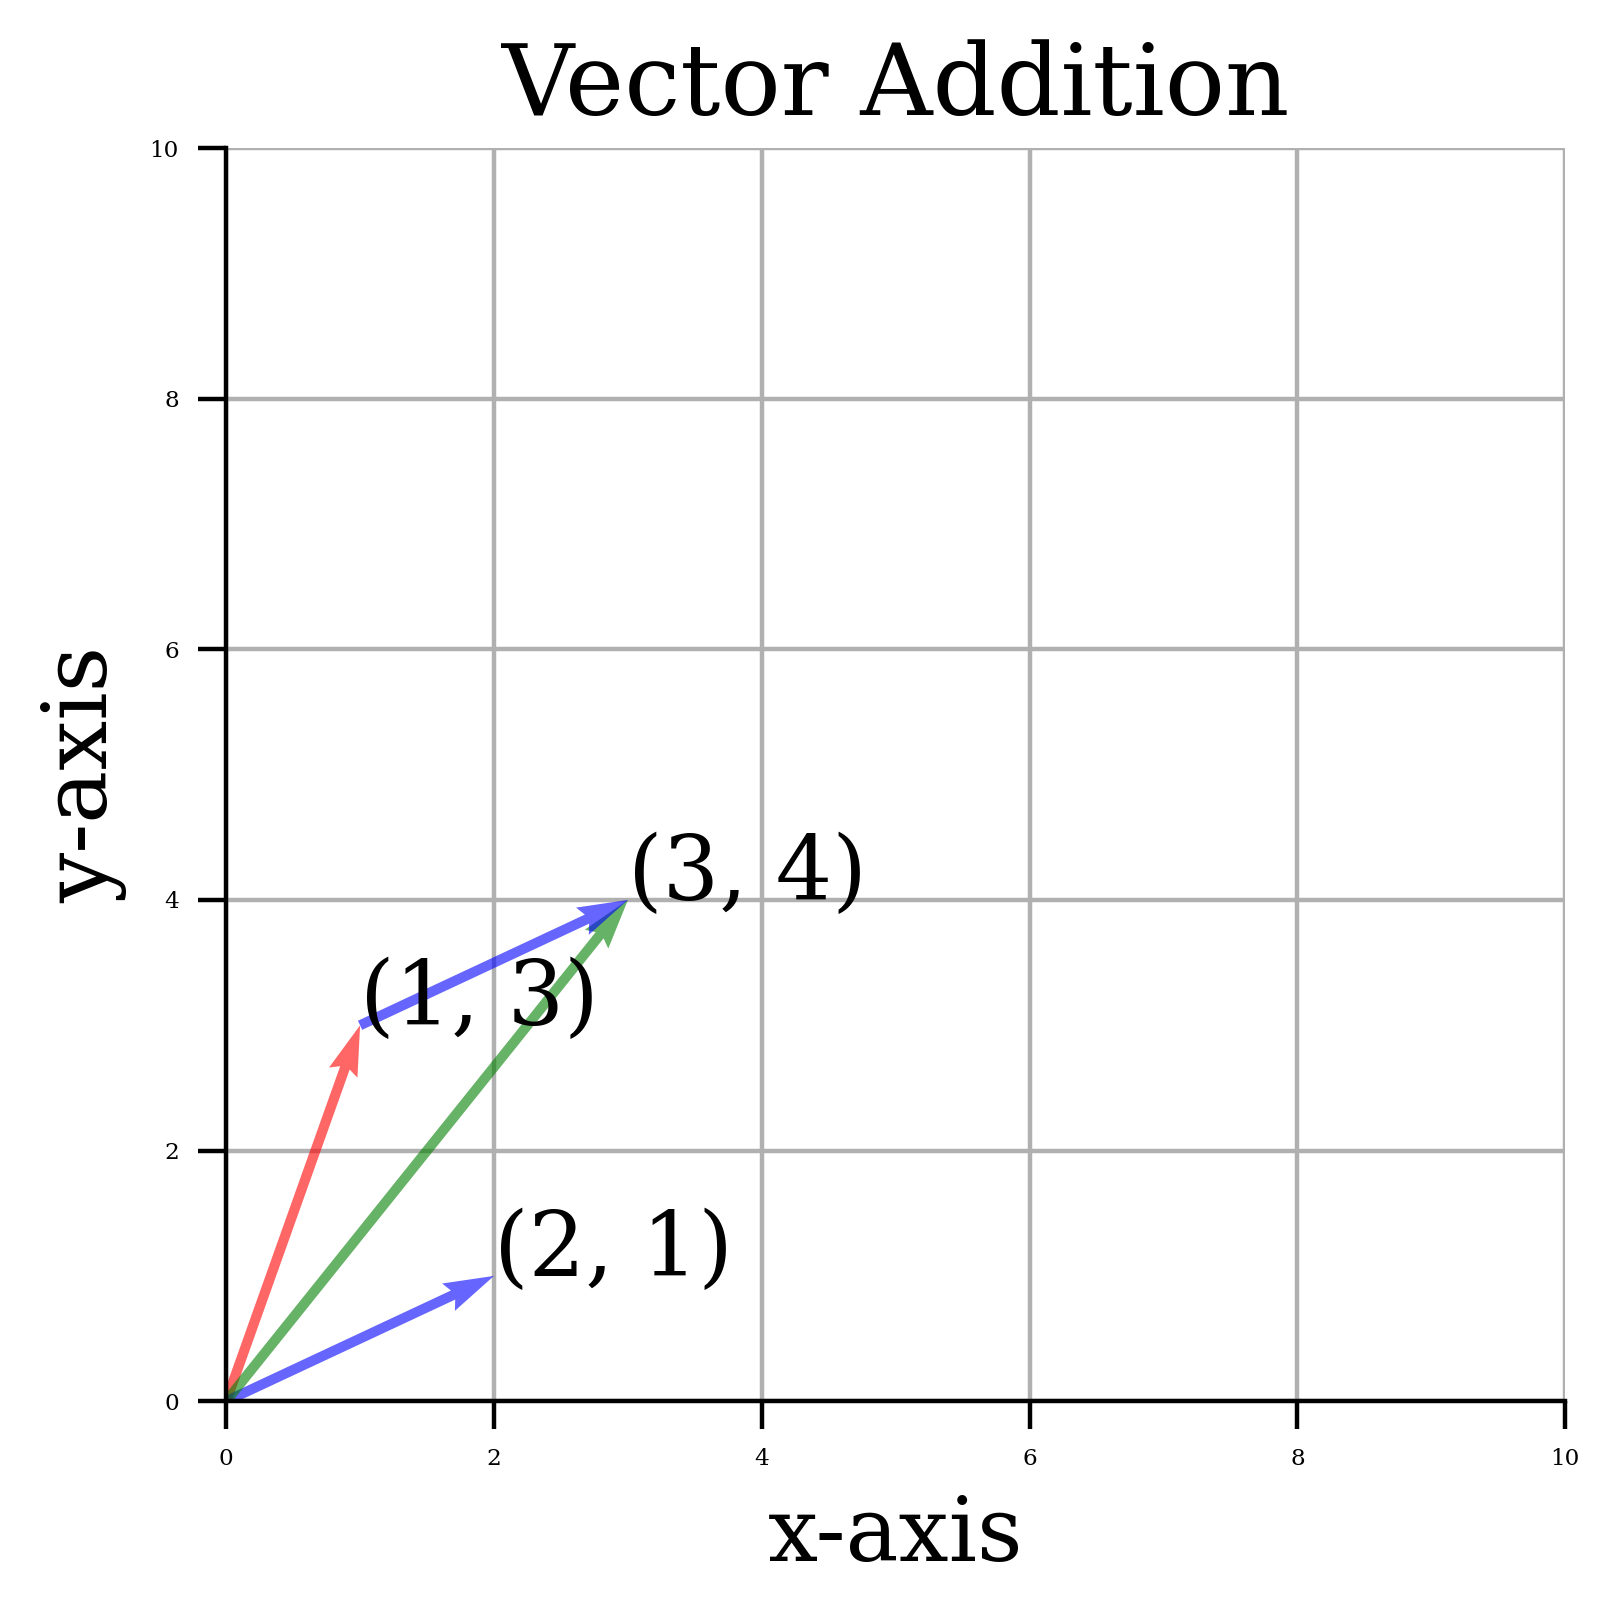

In [ ]:
#@title Plot - Vector Addition
fig, ax = plt.subplots(figsize = (4,4))

vec = np.array([[[0, 0, A[0], A[1]]],
               [[0, 0, B[0], B[1]]],
               [[0, 0, C[0], C[1]]],
               [[A[0], A[1], B[0], B[1]]]])
color = ['r','b','g','b','r']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = color[i], scale=1, alpha = .6)

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

for i in range(3):
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

# ax.text(x= vec[0,0,2]/2, y = vec[0,0,3]/2, s= '$u$', fontsize = 16)
# ax.text(x= 8, y = 9, s= '$v$', fontsize = 16)
# ax.text(x= 6, y = 5.5, s= '$u+v$', fontsize = 16)
# leg = ax.legend([A, B, C], ['$v$', '$u$', '$u+v$'], handlelength = 0, fontsize = 5, loc = 'upper left')
 
ax.set_title('Vector Addition', size = 18)
plt.show()

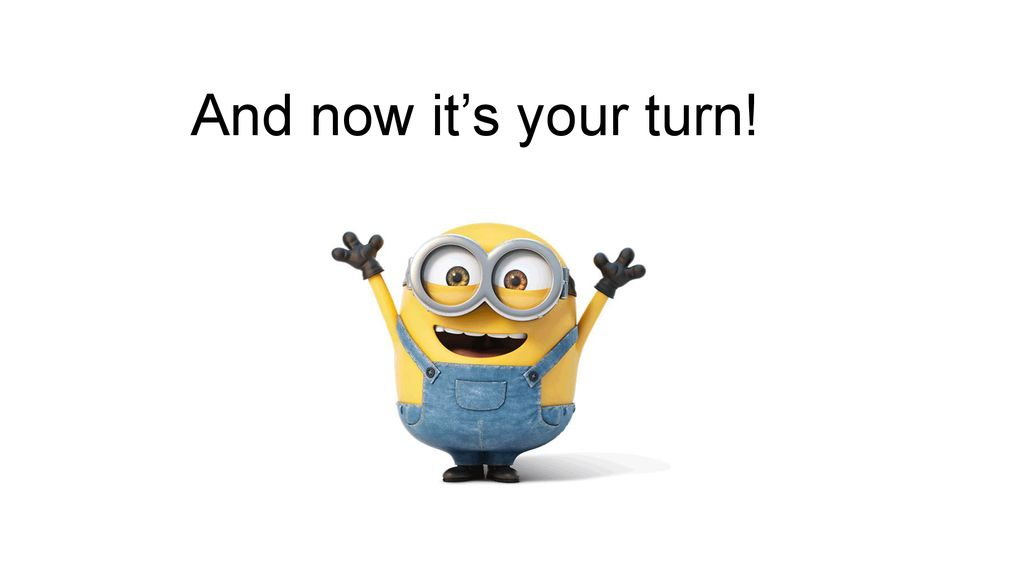

## 1.4.2 Scalar multiplication

**Scalar multiplication** is the multiplication of a vector by a scalar which changes its length but not its direction (only reverse it).

In [ ]:
A = np.array([1, 2])
m = 2

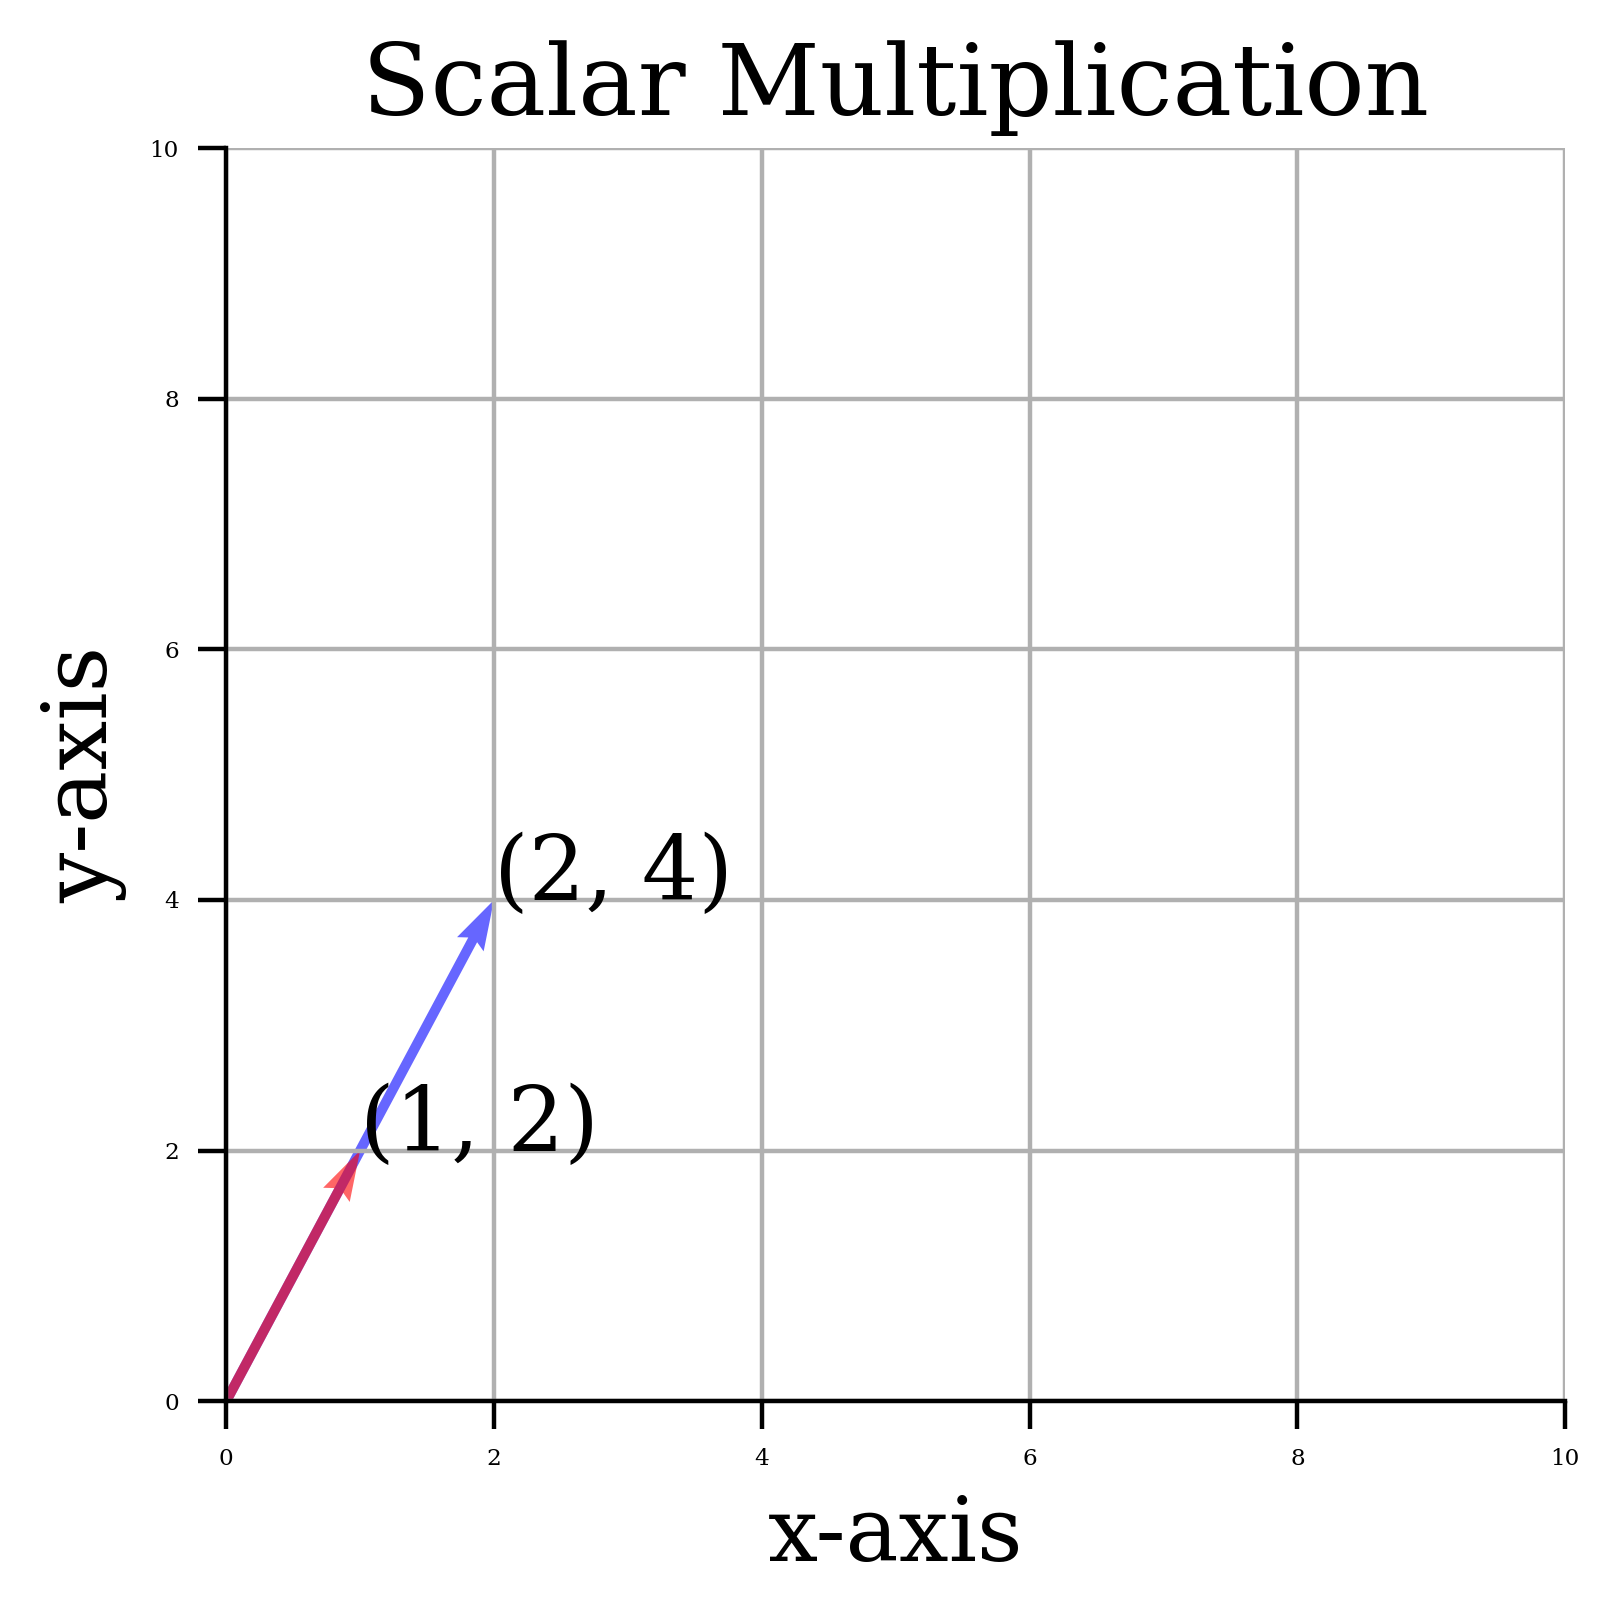

In [ ]:
#@title Plot - Scalar Multiplication

fig, ax = plt.subplots(figsize=(4, 4))

vec = np.array([[[0, 0, A[0], A[1]]],
               [[0, 0, m * A[0], m * A[1]]]])
colors = ['r','b', 'r', 'b']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', 
              color = color[i], scale=1, alpha = .6, zorder = -i)

s = ['$u$', '$3u$', '$v$', '$3v$']  
for i in range(vec.shape[0]):
    ax.text(x = vec[i,0, 2], y = vec[i, 0, 3], 
            s = '(%.0d, %.0d)' %(vec[i,0, 2], vec[i,0, 3]), fontsize = 16)
    # ax.text(x = vec[i,0, 2]/4, y = vec[i,0, 3]/2, 
    #         s = s[i], fontsize = 20)


ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

ax.set_title('Scalar Multiplication', size = 18)
plt.show()

## 1.4.3 A linear combination

**A linear combination** of a set of vectors is a combination of the set using scalar multiplication and vector addition.

![](https://www.superprof.co.uk/resources/wp-content/uploads/2019/06/34-15615364562318-1267.gif)

Let's suppose we have $A = [0, 2]$ and $B = [1, 1]$ and we want to calculate the linear combination of these vectors based on $w = 2A + 3B$

In [ ]:
# w = mA + nB
A = np.array([0, 2])
B = np.array([1, 1])
m = 2
n = 3
w = m * A + n * B


In [ ]:
2*A

array([0, 4])

In [ ]:
w

array([3, 7])

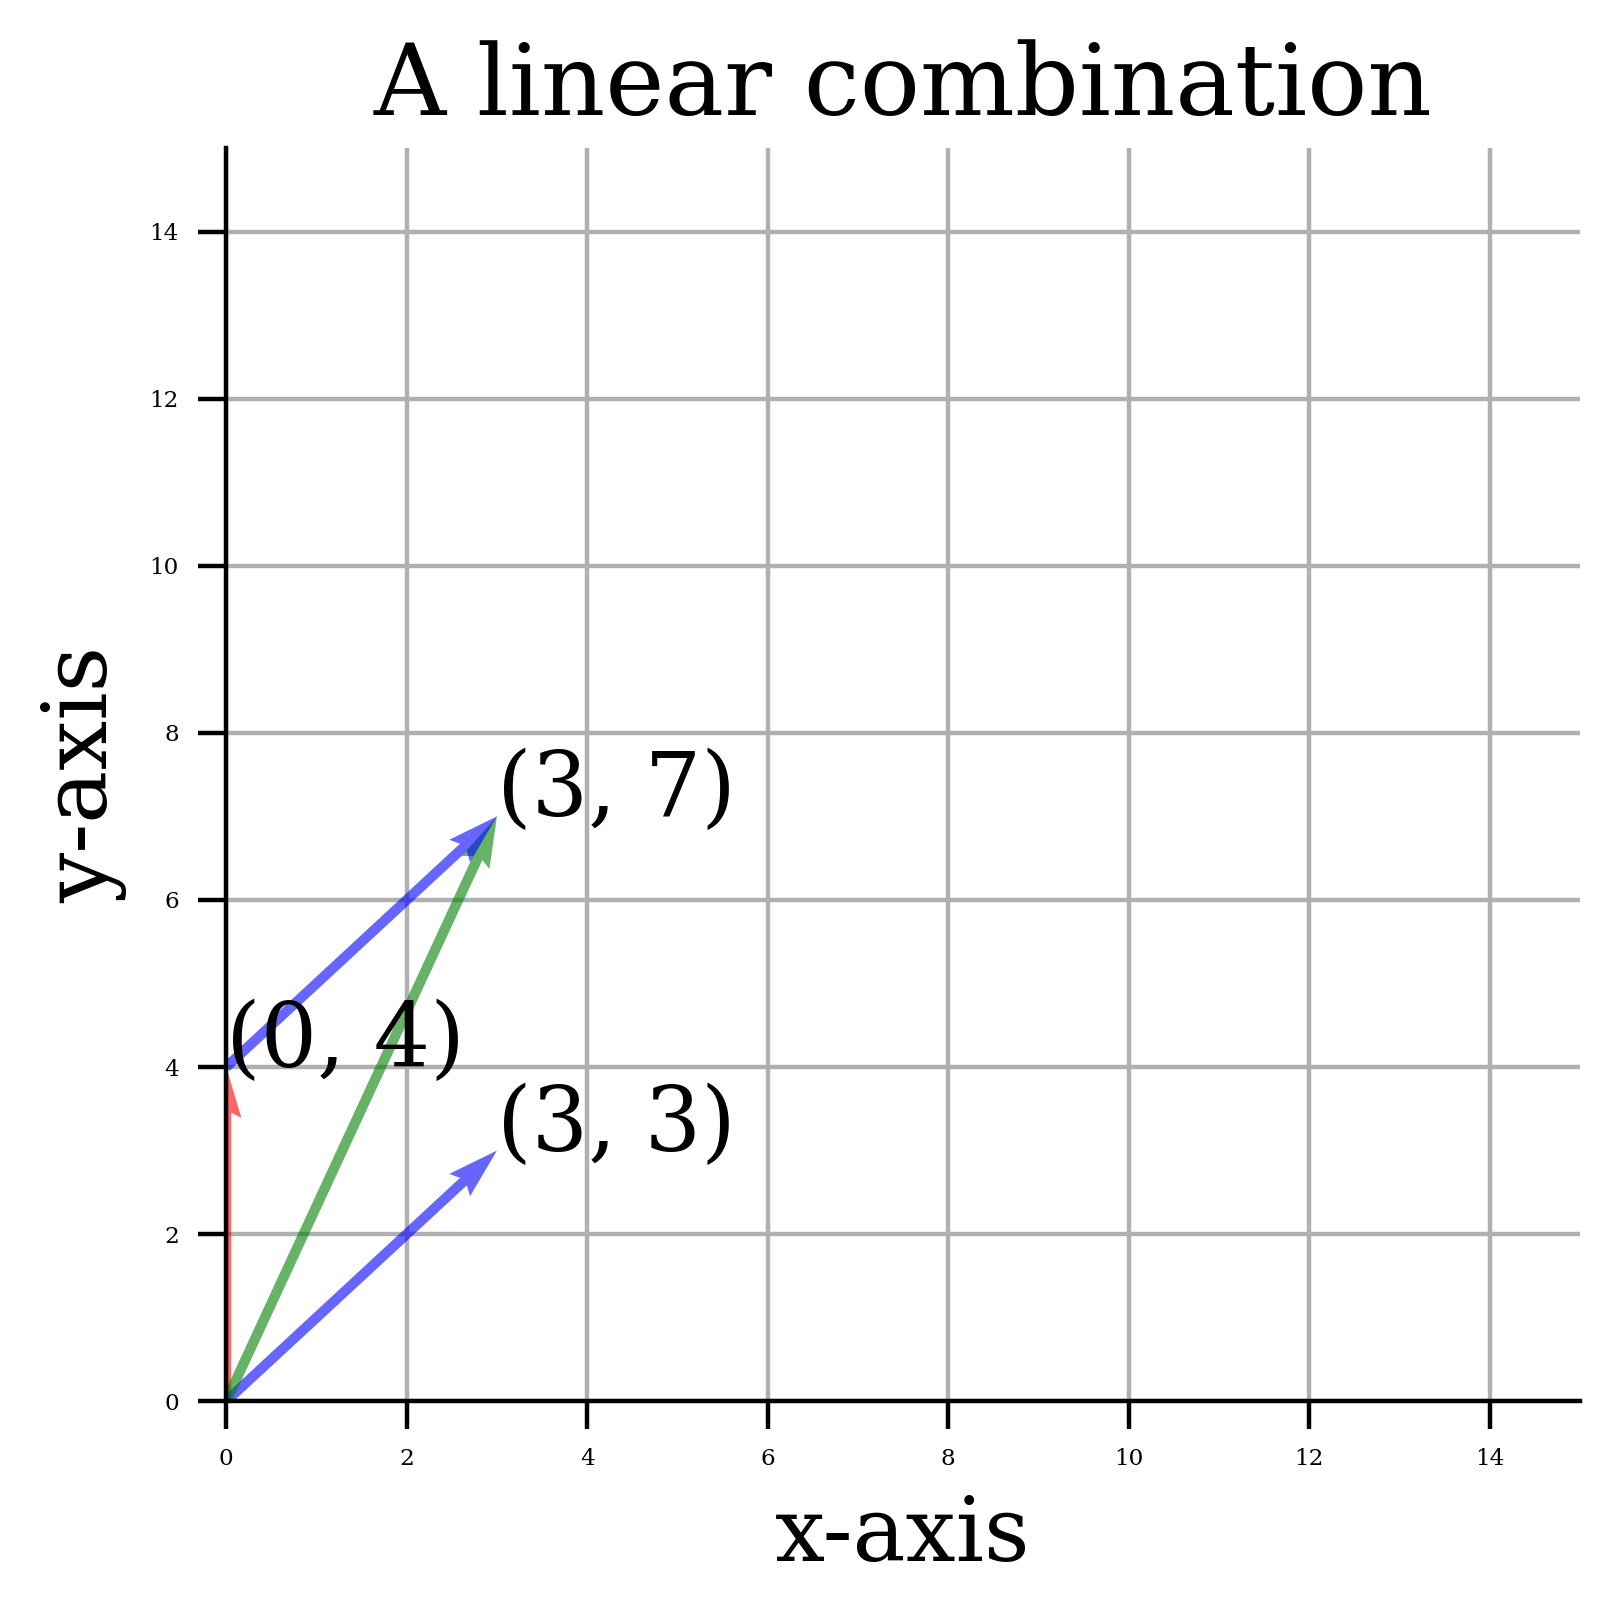

In [ ]:
#@title Plot - A linear combination
fig, ax = plt.subplots(figsize = (4,4))

Am = m * A
Bn = n * B

vec = np.array([[[0, 0, Am[0], Am[1]]],
               [[0, 0, Bn[0], Bn[1]]],
               [[0, 0, w[0], w[1]]],
               [[Am[0], Am[1], Bn[0], Bn[1]]]])
color = ['r','b','g','b','r']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = color[i], scale=1, alpha = .6)

ax.set_xlim([0, 15])
ax.set_ylim([0, 15])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

for i in range(3):
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

# ax.text(x= vec[0,0,2]/2, y = vec[0,0,3]/2, s= '$u$', fontsize = 16)
# ax.text(x= 8, y = 9, s= '$v$', fontsize = 16)
# ax.text(x= 6, y = 5.5, s= '$u+v$', fontsize = 16)
# leg = ax.legend([A, B, C], ['$v$', '$u$', '$u+v$'], handlelength = 0, fontsize = 5, loc = 'upper left')
 
ax.set_title('A linear combination', size = 18)
plt.show()

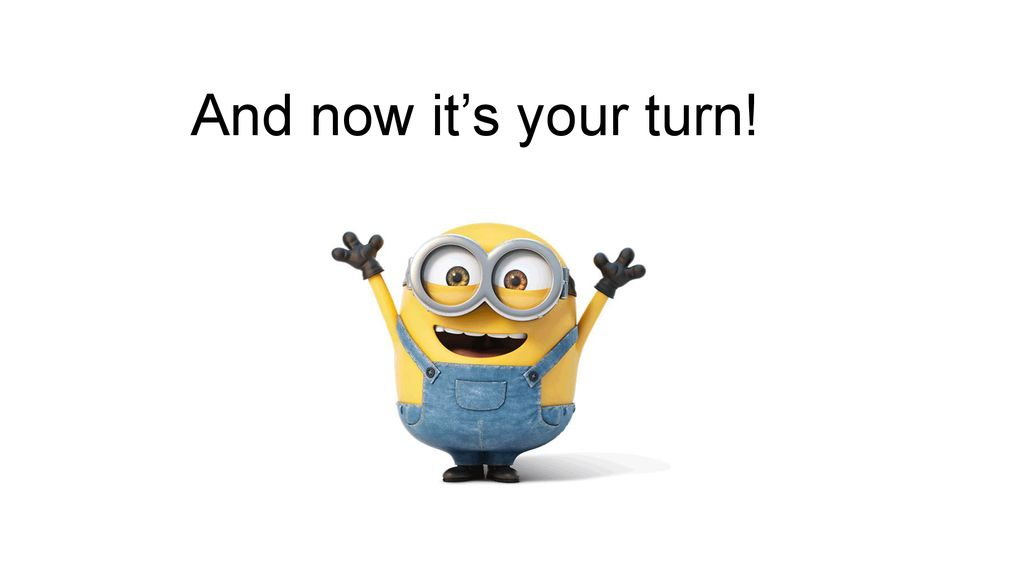

## Section 1.5 Dot Product

Dot product is directional multiplication that apply directional growth of one vector to another. The result shows how much stronger we have made the original vector (Positive, Zero, or Negative). If this value is positive, the angle between the vectors is less than 90 degrees, if it is negative, the angle is greater than 90 degrees, if it is zero, the vectors are orthogonal and the angle is 90 degrees.

To multiply two vectors, we multiply their lengths together but only when they point in the same direction.

![](https://betterexplained.com/wp-content/webp-express/webp-images/uploads/dotproduct/dot_product_components.png.webp)

Let’s take the two following vectors:

$$
\vec{v_1} =
\begin{bmatrix}
1 \\\\
2
\end{bmatrix}
$$

and

$$
\vec{v_2} =
\begin{bmatrix}
-1 \\\\
2
\end{bmatrix}
$$

First, let’s calculate the dot product of $\vec{u}$ and $\vec{v}$:

$$
\vec{v_1} \cdot \vec{v_2} = \begin{bmatrix}
1 \\\\
2
\end{bmatrix}
\cdot
\begin{bmatrix}
-1 \\\\
2
\end{bmatrix}
= 1 \cdot (-1) + 2 \cdot 2 = 3
$$

So it can kind of be thought of ***as multiplication of real numbers in a more geometric fashion between vectors.***

dot product: 3


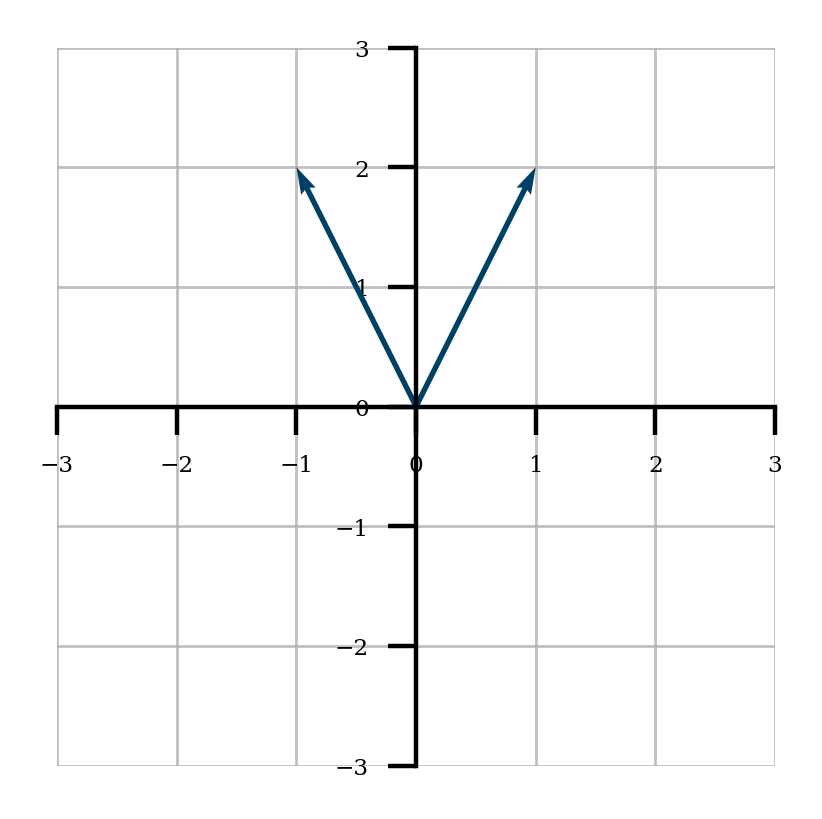

In [ ]:
v1 = np.array([1, 2])
v2 = np.array([-1, 2])

print('dot product:', np.dot(v1, v2))
plot_vector([v1, v2])

dot product: -5


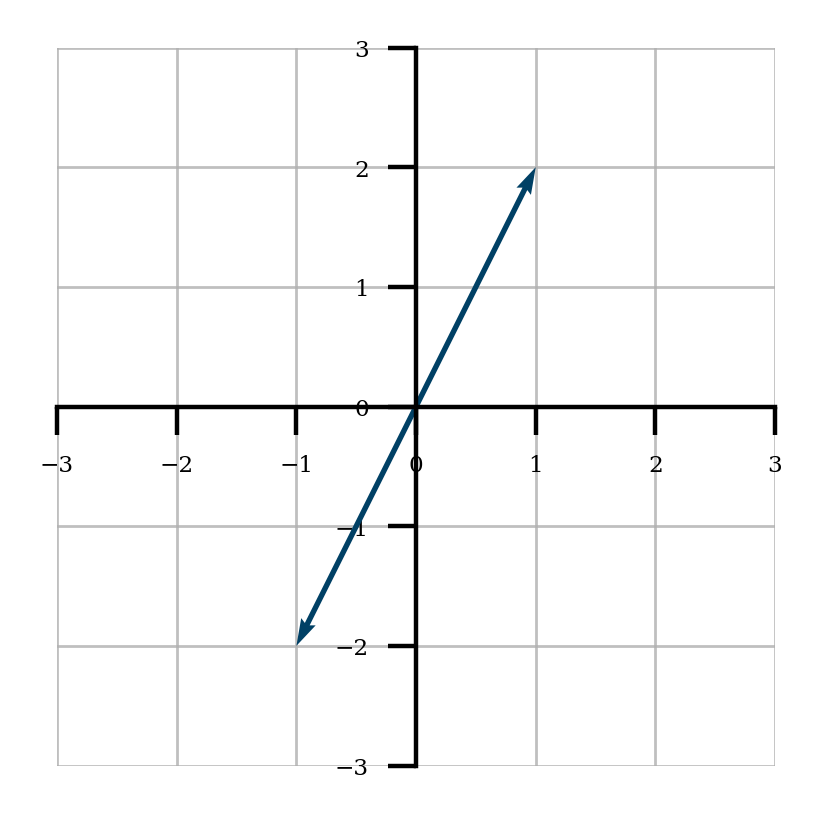

In [ ]:
v1 = np.array([1, 2])
v2 = np.array([-1, -2])

print('dot product:', np.dot(v1, v2))
plot_vector([v1, v2])

dot product: -15


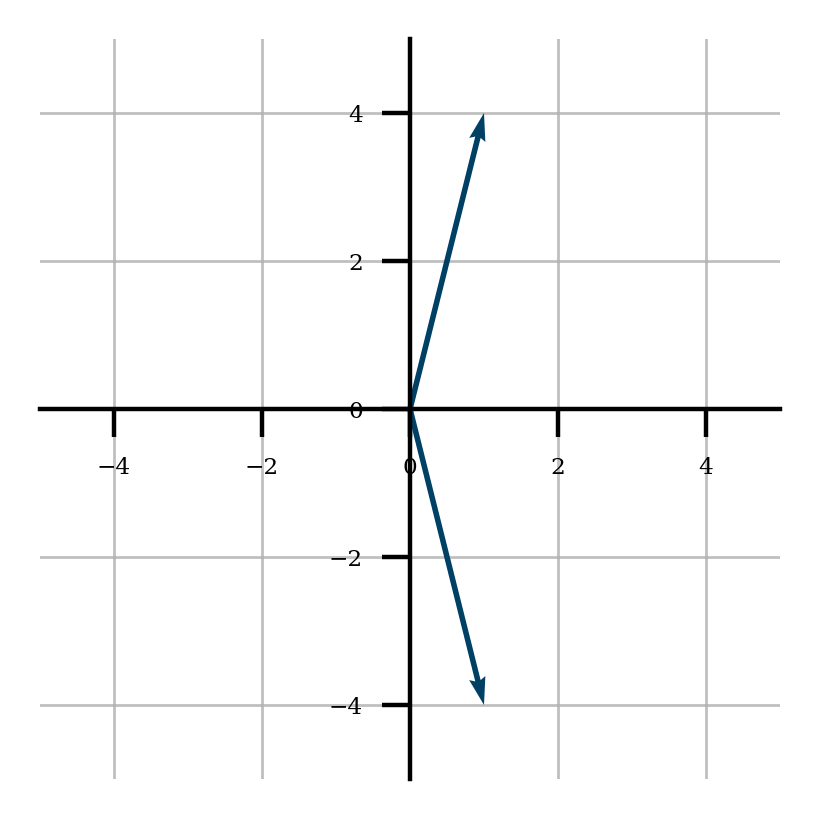

In [ ]:
v1 = np.array([1, 4])
v2 = np.array([1, -4])

print('dot product:', np.dot(v1, v2))
plot_vector([v1, v2])

Dot product: 5


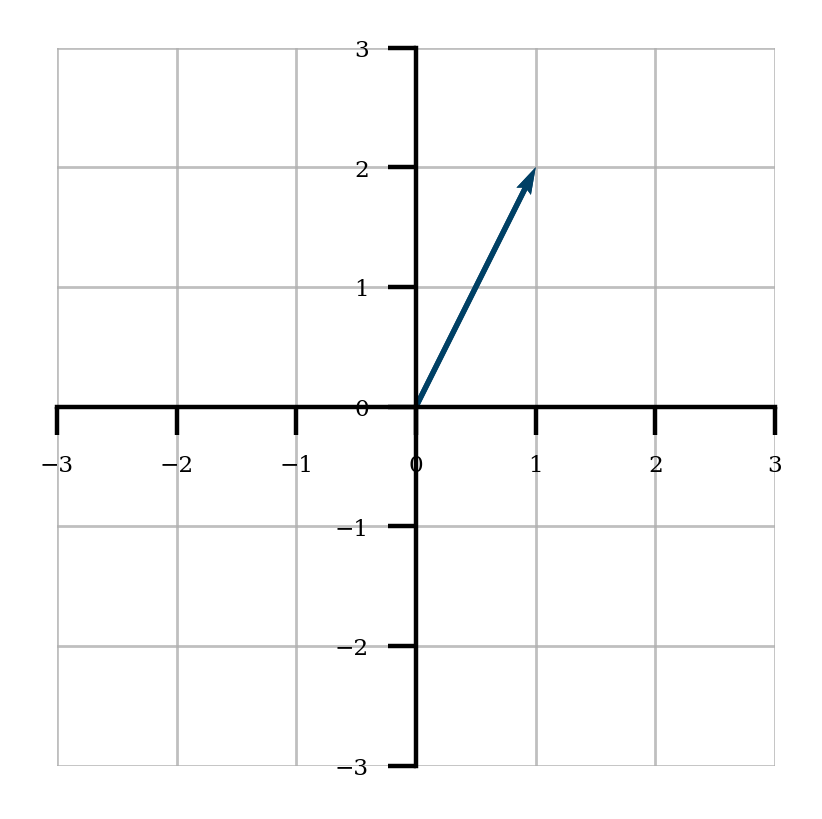

In [ ]:
v1 = np.array([1, 2])
v2 = np.array([1, 2])

print('Dot product:', np.dot(v1, v2))
plot_vector([v1, v2])

Dot product: 5


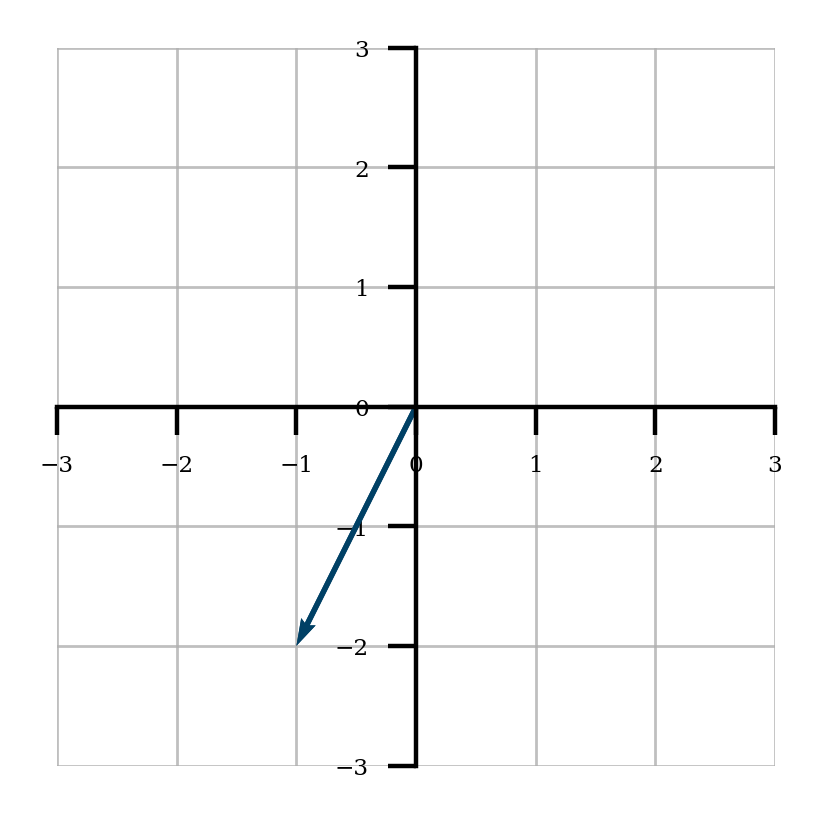

In [ ]:
v1 = np.array([-1, -2])
v2 = np.array([-1, -2])

print('Dot product:', np.dot(v1, v2))
plot_vector([v1, v2])

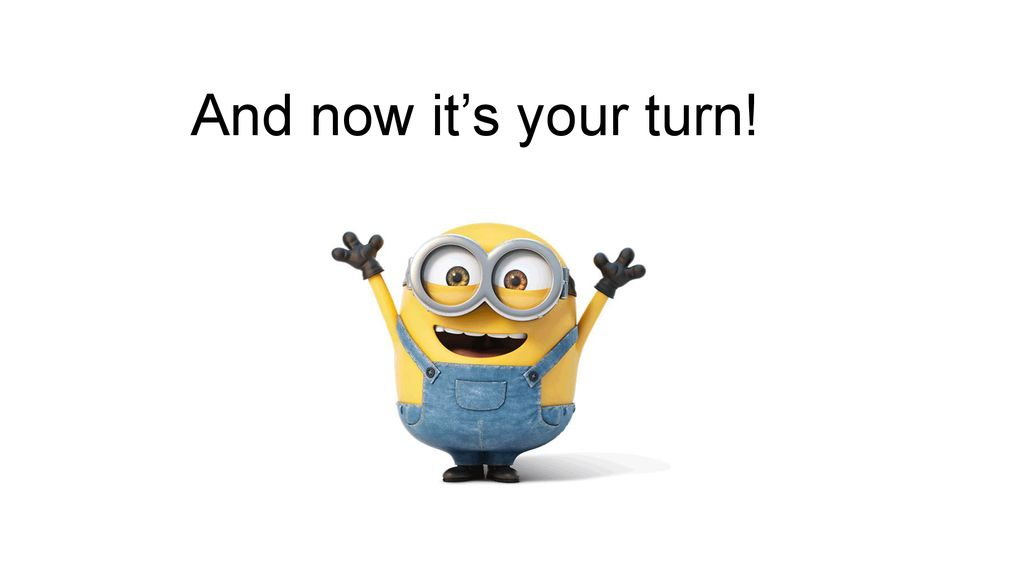

# 1.5 An overview of three types of data science distance measures



There are various methods for computing distances two vectors that in this tutorial we will be go over two of them.
- **Euclidean distance**
- **Manhattan distance:** 
- **Cosine Similarity**
- Jaccard
- Pearson
- Spearman

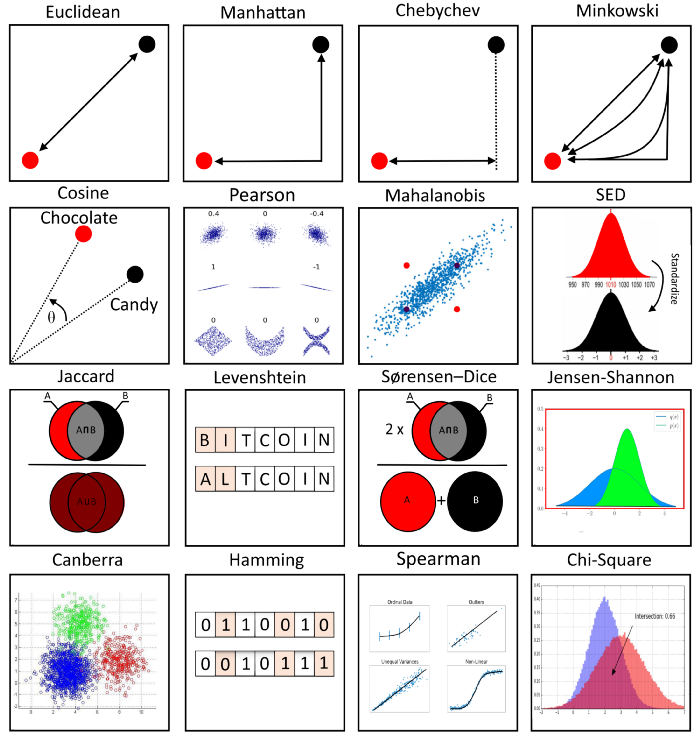

## 1.5.1 Euclidean distance

Euclidean distance: Euclidean distance is also known as distance. When data is dense or continuous, this is the best proximity measure. The Euclidean distance between two points is the length of the path connecting them. The Pythagorean theorem gives this distance between two points.



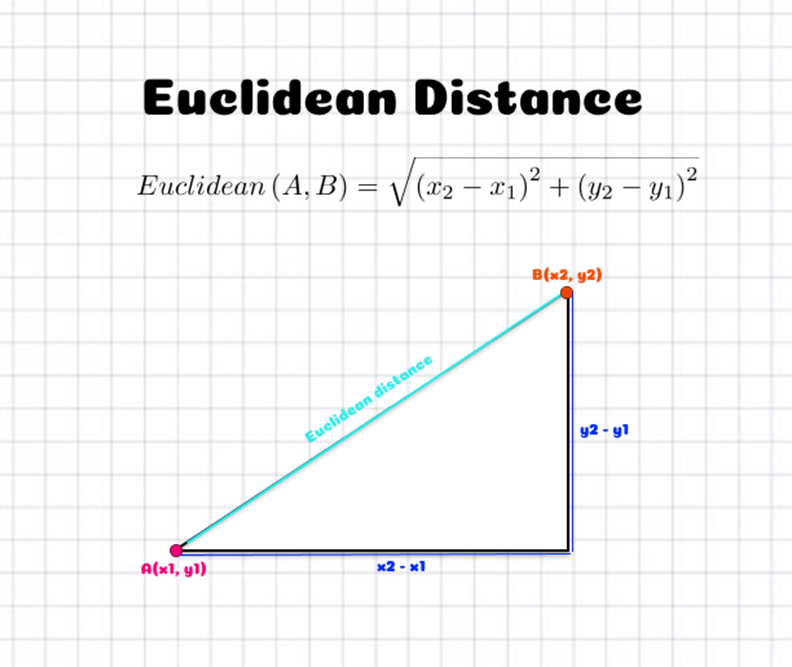

In [ ]:
# Python code to find Euclidean distance
# using square() and sum() methods

# Import NumPy Library
import numpy as np

# initializing points in
# numpy arrays
point1 = np.array([1, 4])
point2 = np.array([1, 2])

# finding sum of squares

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum(np.square(point1 - point2)))
 
# perform the squareroot and
# print Euclidean distance


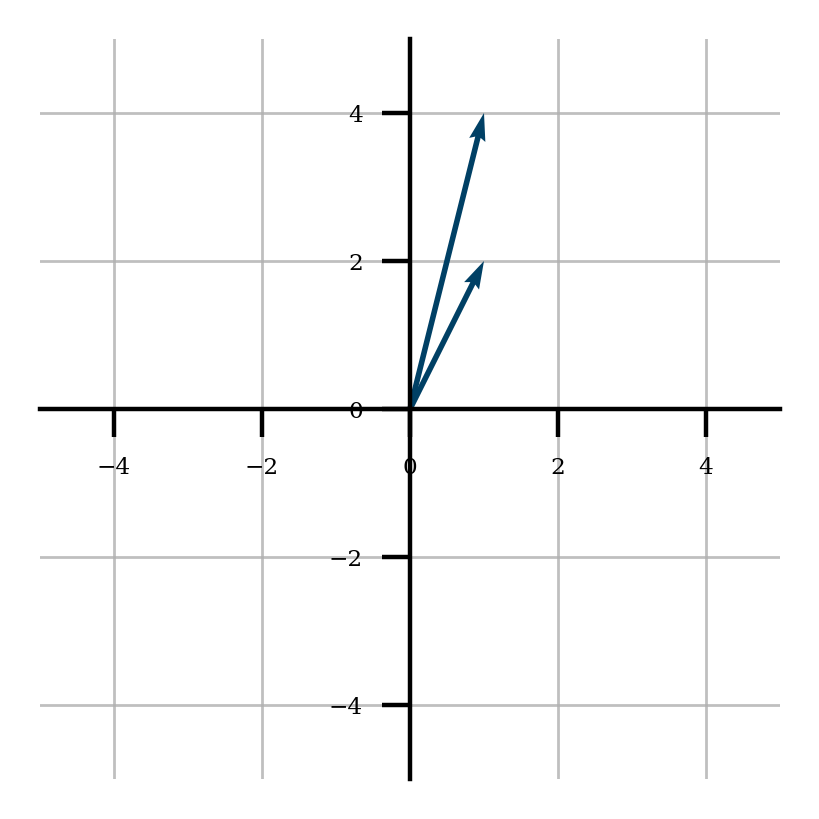

In [ ]:
plot_vector([point1, point2])

## 1.5.2 Manhattan distance

**Manhattan distance:** In a simple way of saying it is the total sum of the difference between the x-coordinates and y-coordinates.

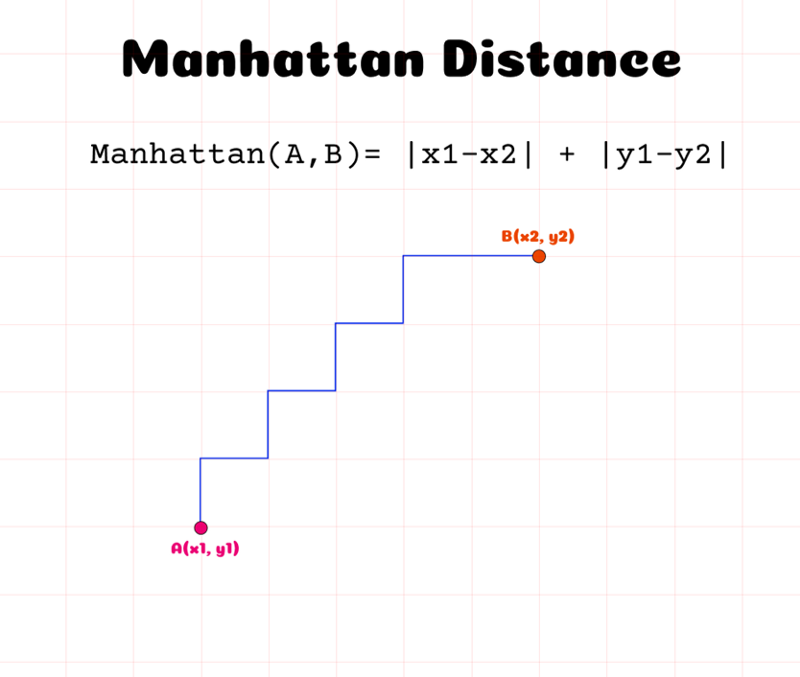

In [ ]:
# Calculating Manhattan Distance from Scratch

def manhattan_distance(x1, x2):
    return abs(x1[0] - x2[0]) + abs(x1[1] - x2[1])

In [ ]:
x1 = np.array([4, 4])
x2 = np.array([2, -4])
print(manhattan_distance(x2, x1))

10


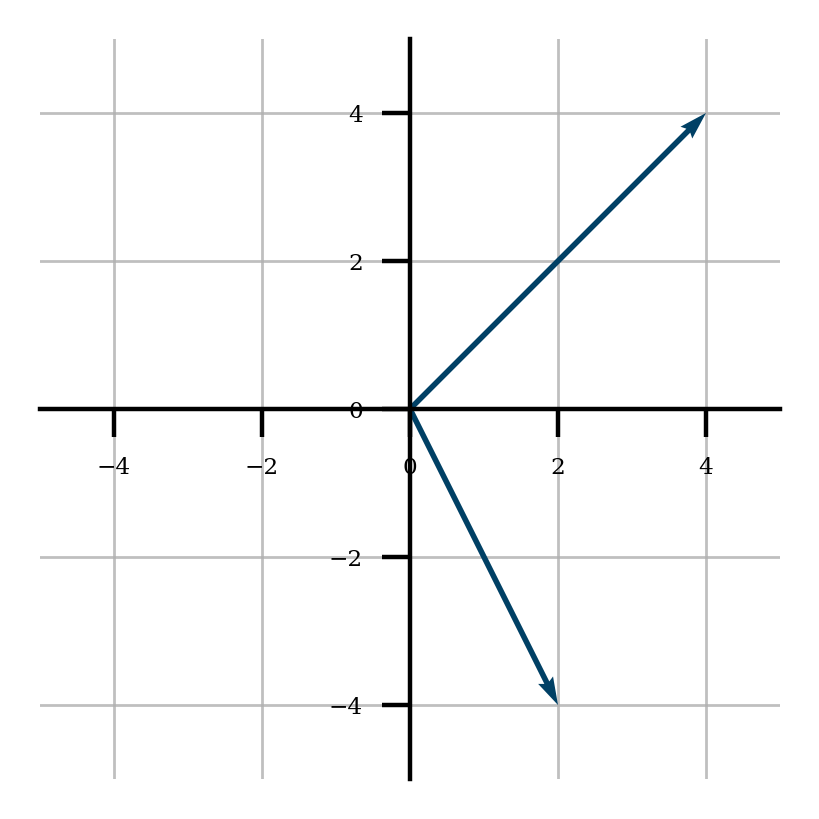

In [ ]:
plot_vector([x1, x2])

## 1.5.3 Cosine similarity

Cosine similarity measures the similarity between two vectors. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. 

![](https://goodboychan.github.io/images/copied_from_nb/image/cos_sim.png)

In [ ]:
A = np.array([1, 2])
B = np.array([1,2])
C = 1 * B
vector_A_lenght = np.sqrt(np.square(A[0]) + np.square(A[1]))
vector_C_lenght = np.sqrt(np.square(C[0]) + np.square(C[1]))

cosine_similarity_A_C = np.dot(A, C)/(vector_A_lenght*vector_C_lenght)
cosine_similarity_A_C

0.9999999999999998

In [ ]:
A = np.array([1, 2])
B = np.array([2,2])
C = 2 * B
vector_A_lenght = np.sqrt(np.square(A[0]) + np.square(A[1]))
vector_C_lenght = np.sqrt(np.square(C[0]) + np.square(C[1]))

cosine_similarity_A_C = np.dot(A, C)/(vector_A_lenght*vector_C_lenght)
cosine_similarity_A_C

0.9486832980505138

In [ ]:
print(manhattan_distance(A, C))

5


In [ ]:
sum_vectors = np.sum(np.square(A - C))
sum_vectors

13

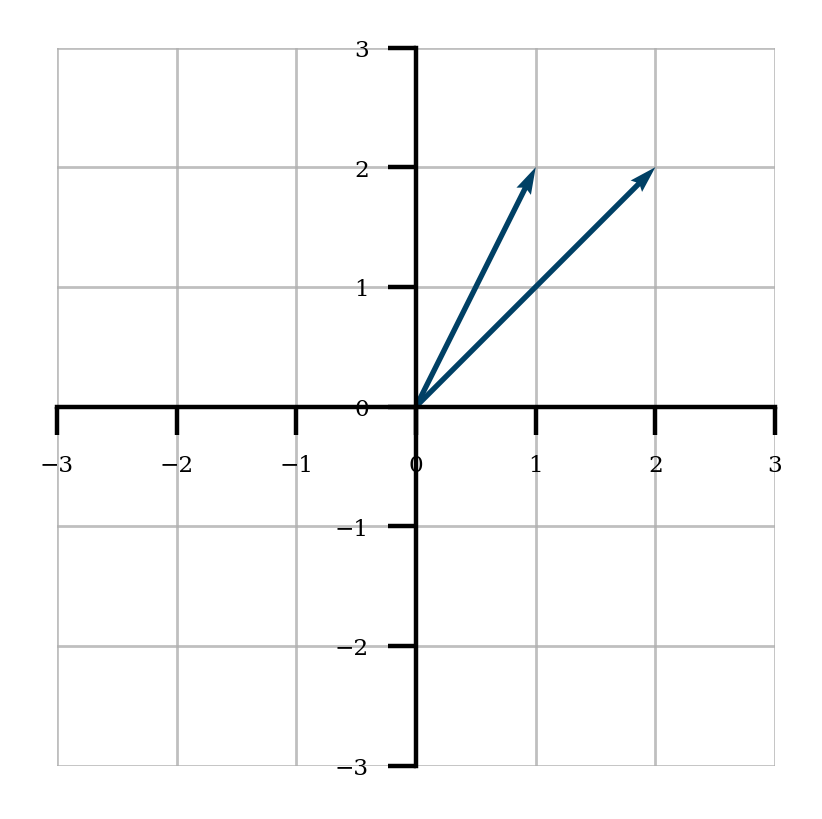

In [ ]:
plot_vector([A, B])

As a result, we need to choose the appropriate measurement of ML for each context:

- **Manhattan Distance:** This metric is very useful in measuring the distance between two streets in a given city, where the distance can be measured in terms of the number of blocks that separate two different places.
- **Cosine Similarity:** This metric is widely used in text mining, natural language processing, and information retrieval systems.

# 1.6 Hands-on Project: Similarity 

We have 3 cars with these feature values (***carlength***,***enginesize***):

**Normalize and Display them?**

In [5]:
import pandas as pd

df = pd.read_csv('/content/CarPrice_Assignment.csv')
df = df[['car_ID', 'CarName', 'carlength', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'price']]
df.head(20)

,car_ID,CarName,carlength,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,168.8,130,111,21,27,13495.000
1,2,alfa-romero stelvio,168.8,130,111,21,27,16500.000
2,3,alfa-romero Quadrifoglio,171.2,152,154,19,26,16500.000
3,4,audi 100 ls,176.6,109,102,24,30,13950.000
4,5,audi 100ls,176.6,136,115,18,22,17450.000
5,6,audi fox,177.3,136,110,19,25,15250.000
6,7,audi 100ls,192.7,136,110,19,25,17710.000
7,8,audi 5000,192.7,136,110,19,25,18920.000
8,9,audi 4000,192.7,131,140,17,20,23875.000
9,10,audi 5000s (diesel),178.2,131,160,16,22,17859.167


## 1.6.1 Define the vectors

In [11]:
car_1 = df.iloc[:, 2:4].to_numpy()[5]
car_2 = df.iloc[:, 2:4].to_numpy()[6]
car_3 = df.iloc[:, 2:4].to_numpy()[17]

## 1.6.2 Calculate the length of vectors

In [12]:
vector_car_1_length = np.sqrt(np.square(car_1[0]) + np.square(car_1[1]))
vector_car_2_length = np.sqrt(np.square(car_2[0]) + np.square(car_2[1]))
vector_car_3_length = np.sqrt(np.square(car_3[0]) + np.square(car_3[1]))

## 1.6.3 Calculate the similarity between vectors

In [13]:
cosine_similarity12 = np.dot(car_1, car_2)/(vector_car_1_length*vector_car_2_length)
cosine_similarity23 = np.dot(car_2, car_3)/(vector_car_2_length*vector_car_3_length)
cosine_similarity13 = np.dot(car_1, car_3)/(vector_car_1_length*vector_car_3_length)

print("car 1 vector: ", car_1)
print("car 2 vector: ", car_2)
print("car 3 vector: ", car_3)
print('Similarity Score of car_1 and car_2: ', cosine_similarity12)
print('Similarity Score of car_2 and car_3: ', cosine_similarity23)
print('Similarity Score of car_1 and car_3: ', cosine_similarity13)

car 1 vector:  [177.3 136. ]
car 2 vector:  [192.7 136. ]
car 3 vector:  [197. 209.]
Similarity Score of car_1 and car_2:  0.9992100774303181
Similarity Score of car_2 and car_3:  0.9799940458934868
Similarity Score of car_1 and car_3:  0.987129135511957


In [14]:
from scipy import spatial

result_12 = 1 - spatial.distance.cosine(car_1, car_2)
result_12

0.9992100774303181

In [ ]:
print('Similarity Score of car_1 and car_2: ', manhattan_distance(car_1, car_2))
print('Similarity Score of car_2 and car_3: ', manhattan_distance(car_2, car_3))
print('Similarity Score of car_1 and car_3: ', manhattan_distance(car_1, car_3))

Similarity Score of car_1 and car_2:  15.399999999999977
Similarity Score of car_2 and car_3:  77.30000000000001
Similarity Score of car_1 and car_3:  92.69999999999999


In [ ]:
print('Similarity Score of car_1 and car_2: ', euclidean_distance(car_1, car_2))
print('Similarity Score of car_2 and car_3: ', euclidean_distance(car_2, car_3))
print('Similarity Score of car_1 and car_3: ', euclidean_distance(car_1, car_3))

Similarity Score of car_1 and car_2:  15.399999999999977
Similarity Score of car_2 and car_3:  73.12653417194062
Similarity Score of car_1 and car_3:  75.61144093323443


# Summary

In this tutorial, we specifically focused on:

*   A geometrical view of vectors, their properties, and their operations
*   Conceptual understanding of similarity measures







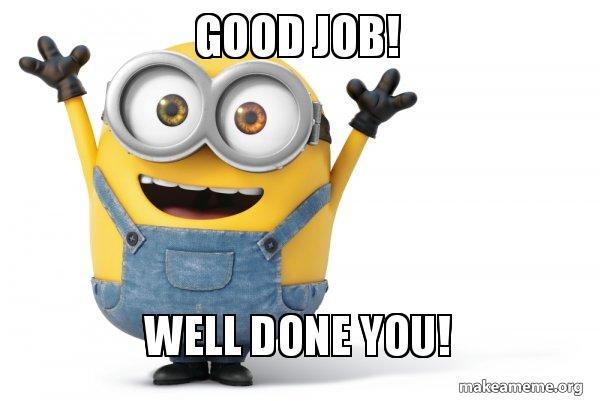